# Applied Data Science Capstone project


# Executive Summary

In this project, we will build a model to predict a road accident severity based on several features. The dataset comes from Leeds, UK and can be downloaded from the UK government open data portal website. The csv file contains records of traffic accidents that took place in 2017 with detailed features including Severity, which will be our dependent variable. Severity is a categorical variable that supports 3 classes: "Fatal", "Serious", and "Slight". 6 Machine learning algorithms will be used, evaluated, and compared to choose the classifier that shows the best performance. Evaluation was performed using KFold cross validation with 10 splits. The classifiers are:
  
Logistic Regression, 
LinearDiscriminantAnalysis (LDA), 
K Nearest Neighbor (Knn), 
Decision Tree (CART), 
Gaussian Naive Bayes, and 
Support Vector Machine (SVM)

# Let's Start!

First, let's start by importing libraries that we will use to write our code:

In [1]:
import numpy as np #provides Linear Algebra tools
import pandas as pd #for data manipulation (It is actually built on top of numpy)
import matplotlib.pyplot as plt # for data visualization library
import seaborn as sns # Another package for data visualization

In [2]:
data=pd.read_csv('C:/Users/Desktop/accident data.csv') #import our dataset

In [3]:
data.head() #let's take a look at the first 5 rows

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Time,road_type,Road_Surface,Day_or_Night,Weather_Conditions,Type_of_Vehicle,Casualty_Class,Gender,Age_of_Casualty,Severity
0,3AP0313,426340,428455,1,815,A,Dry,Day,Other,Car,Pedestrian,Female,61,Serious
1,3BE0850,430828,433222,2,1330,A,Dry,Day,Fine without high winds,Pedal cycle,Driver or rider,Male,36,Slight
2,4110858,428940,429856,2,805,A,Wet/Damp,Day,Fine without high winds,Car,Driver or rider,Male,32,Slight
3,4110858,428940,429856,2,805,A,Wet/Damp,Day,Fine without high winds,Car,Driver or rider,Male,30,Slight
4,4111495,429899,434277,2,1705,U,Wet/Damp,Night,Raining without high winds,Car,Vehicle or pillion passenger,Female,26,Slight


# Exploratory Data Analysis

Let's begin with some exploratory data analysis! We will start by checking out missing data!

# Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

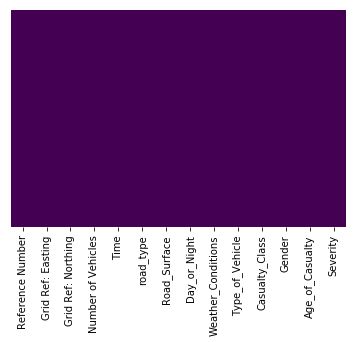

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are no missing values. Yellow marks should appear to indicate the missing values but it is not the case here.  

Now, let's check the causlty severity cases, There are 3 cases:

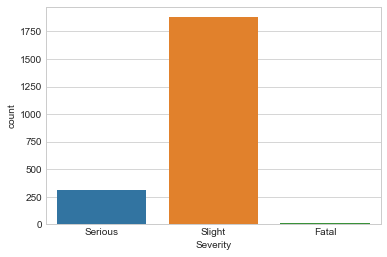

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Severity',data=data)

Now, let's explore severities by gender:

Severity
Fatal        15
Serious     309
Slight     1879
dtype: int64


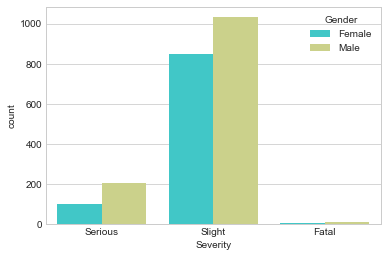

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Severity',hue='Gender',data=data,palette='rainbow')
print(data.groupby('Severity').size())

# Data Cleaning

We can clearly see that some columns are irrelevent to our problem, so we have to drop them 

In [7]:
data= data.drop(['Reference Number','Grid Ref: Easting','Grid Ref: Northing','Type_of_Vehicle','Number of Vehicles'], axis=1)

In [8]:
data.head()

,Time,road_type,Road_Surface,Day_or_Night,Weather_Conditions,Casualty_Class,Gender,Age_of_Casualty,Severity
0,815,A,Dry,Day,Other,Pedestrian,Female,61,Serious
1,1330,A,Dry,Day,Fine without high winds,Driver or rider,Male,36,Slight
2,805,A,Wet/Damp,Day,Fine without high winds,Driver or rider,Male,32,Slight
3,805,A,Wet/Damp,Day,Fine without high winds,Driver or rider,Male,30,Slight
4,1705,U,Wet/Damp,Night,Raining without high winds,Vehicle or pillion passenger,Female,26,Slight


For the time, I think it is better to convert it categorcial varibale. Since the data is obtained from UK, a quick internet search indicates that there are 2 time intervals that are considered as peak hour: 6:30 -> 9:30 and 16:00 -> 19:00. So, Time column will be converted to 2 values : Peak and Offpeak.

In [11]:
for i in range (data['Time'].count()):
    
    if (data['Time'][i] in range(360,931)) or (data['Time'][i] in range(1600,1901)):
        data['Time'][i]='peak'
    else:
        data['Time'][i]='offpeak'

C:\Users\kict\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [13]:
data.head()

,Time,road_type,Road_Surface,Day_or_Night,Weather_Conditions,Casualty_Class,Gender,Age_of_Casualty,Severity
0,offpeak,A,Dry,Day,Other,Pedestrian,Female,61,Serious
1,offpeak,A,Dry,Day,Fine without high winds,Driver or rider,Male,36,Slight
2,offpeak,A,Wet/Damp,Day,Fine without high winds,Driver or rider,Male,32,Slight
3,offpeak,A,Wet/Damp,Day,Fine without high winds,Driver or rider,Male,30,Slight
4,offpeak,U,Wet/Damp,Night,Raining without high winds,Vehicle or pillion passenger,Female,26,Slight


# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 9 columns):
Time                  2203 non-null object
road_type             2203 non-null object
Road_Surface          2203 non-null object
Day_or_Night          2203 non-null object
Weather_Conditions    2203 non-null object
Casualty_Class        2203 non-null object
Gender                2203 non-null object
Age_of_Casualty       2203 non-null int64
Severity              2203 non-null object
dtypes: int64(1), object(8)
memory usage: 155.0+ KB


In [16]:
Time=pd.get_dummies(data['Time'],drop_first=True)
road_type=pd.get_dummies(data['road_type'],drop_first=True)
Road_Surface=pd.get_dummies(data['Road_Surface'],drop_first=True)
Day_or_Night=pd.get_dummies(data['Day_or_Night'],drop_first=True)
Weather_Conditions=pd.get_dummies(data['Weather_Conditions'],drop_first=True)
Casualty_Class=pd.get_dummies(data['Casualty_Class'],drop_first=True)
Gender=pd.get_dummies(data['Gender'],drop_first=True)

In [17]:
data.drop(['Time','road_type','Road_Surface','Day_or_Night','Weather_Conditions','Casualty_Class','Gender'],axis=1,inplace=True)

In [18]:
data.head()

,Age_of_Casualty,Severity
0,61,Serious
1,36,Slight
2,32,Slight
3,30,Slight
4,26,Slight


In [19]:
data = pd.concat([Time,road_type,Road_Surface,Day_or_Night,Weather_Conditions,Casualty_Class,Gender,data],axis=1)

In [20]:
data.head()

,peak,A(M),B,C,M,U,Frost/Ice,Snow,Wet/Damp,Night,...,Other,Raining with high winds,Raining without high winds,Snowing with high winds,Snowing without high winds,Pedestrian,Vehicle or pillion passenger,Male,Age_of_Casualty,Severity
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,61,Serious
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,36,Slight
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,32,Slight
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,30,Slight
4,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,26,Slight


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 22 columns):
peak                            2203 non-null uint8
A(M)                            2203 non-null uint8
B                               2203 non-null uint8
C                               2203 non-null uint8
M                               2203 non-null uint8
U                               2203 non-null uint8
Frost/Ice                       2203 non-null uint8
Snow                            2203 non-null uint8
Wet/Damp                        2203 non-null uint8
Night                           2203 non-null uint8
Fine without high winds         2203 non-null uint8
Fog or mist (if hazard)         2203 non-null uint8
Other                           2203 non-null uint8
Raining with high winds         2203 non-null uint8
Raining without high winds      2203 non-null uint8
Snowing with high winds         2203 non-null uint8
Snowing without high winds      2203 non-null uint8
Pedestria

# Building our models

Let's start by importing libraries sklearn package.  (machine learning package) 

In [22]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Splitting dataset into Training and validation

In [19]:
array = data.values
X = array[:,0:21]
Y = array[:,21]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Preparing algorithms

In [21]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Now the magic happens

In [22]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.852469 (0.031134)
LDA: 0.841127 (0.036025)
KNN: 0.838258 (0.027825)
CART: 0.741227 (0.030071)
NB: 0.059027 (0.016118)
SVM: 0.853602 (0.030610)


We can clealy see that Logistic Regression model and Support Vector Machine model are the best. SVM slightly outperforms , so we choose it for further validation

In [25]:
# Make predictions on validation dataset
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train)
predictions = svclassifier.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8208616780045351
[[  0   0   2]
 [  1   0  63]
 [  0  13 362]]
             precision    recall  f1-score   support

      Fatal       0.00      0.00      0.00         2
    Serious       0.00      0.00      0.00        64
     Slight       0.85      0.97      0.90       375

avg / total       0.72      0.82      0.77       441



The performance validation results shows an acceptable results. However, this can be further improved in the future. 

# Thank you !